In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:

url = "https://drive.google.com/uc?export=download&id=1FIGNV4-DR52uDwkHHj_JbbpjAz7uJZvI"

# Load the dataset
dataset_cluster = pd.read_csv(url)

# Display the first few rows of the dataframe
print(dataset_cluster.head())


   claim_amount  vintage  marital_status  qualification   cltv  Area_Urban  \
0           555        5               0              3   5263           1   
1           625        5               0              2   6064           1   
2           821        5               0              2   8314           1   
3          1498        5               0              3  13995           1   
4           559        5               0              2   4822           1   

   type_of_policy_Silver  policy_b  policy_c  num_policies_More than 1  
0                      1         0         0                         0  
1                      1         0         0                         1  
2                      1         0         0                         1  
3                      1         0         1                         0  
4                      1         0         0                         0  


# Finding number of clustering through elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

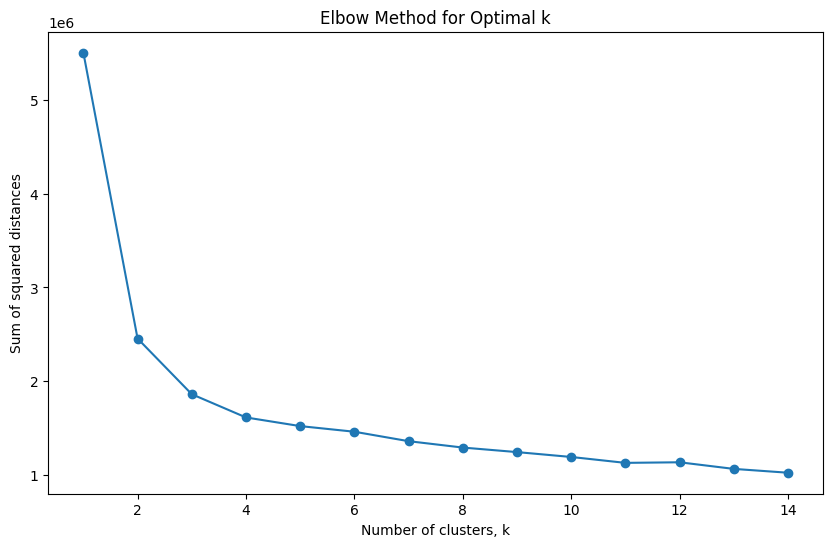

In [3]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

import numpy as np
scaler = MinMaxScaler()

dataset_cluster['cltv'] = scaler.fit_transform(dataset_cluster[['cltv']])
dataset_cluster['claim_amount'] = scaler.fit_transform(dataset_cluster[['claim_amount']])
dataa = dataset_cluster.copy()
# Determine the optimal number of clusters using the elbow method
sse = []
k_candidates = range(1, 15)

for k in k_candidates:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    kmeans.fit(dataset_cluster)
    sse.append(kmeans.inertia_)

# Plot SSE (elbow method)
plt.figure(figsize=(10, 6))
plt.plot(k_candidates, sse, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [4]:
dataa.head()

,claim_amount,vintage,marital_status,qualification,cltv,Area_Urban,type_of_policy_Silver,policy_b,policy_c,num_policies_More than 1
0,0.075122,5,0,3,0.126664,1,1,0,0,0
1,0.084597,5,0,2,0.145941,1,1,0,0,1
2,0.111126,5,0,2,0.200091,1,1,0,0,1
3,0.202761,5,0,3,0.336815,1,1,0,1,0
4,0.075663,5,0,2,0.116050,1,1,0,0,0


#Mini Batch Kmeans - ( SSE and Davies-Bouldin Index Accuracy Metric)



In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import davies_bouldin_score

n_clusters = 3
batch_size = 1000

kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=100)

kmeans.fit(dataset_cluster)

centers_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

if not isinstance(dataset_cluster, pd.DataFrame):
    df_kmeans = pd.DataFrame(dataset_cluster)
else:
    df_kmeans = dataset_cluster.copy()

df_kmeans['Cluster'] = labels_kmeans

# Calculate SSE for each cluster
sse_per_cluster = np.zeros(n_clusters)
for i in range(n_clusters):
    cluster_points = df_kmeans[df_kmeans['Cluster'] == i].drop('Cluster', axis=1)
    distances = np.linalg.norm(cluster_points - centers_kmeans[i], axis=1)
    sse_per_cluster[i] = np.mean(np.square(distances))

# Mean SSE across all clusters
mean_sse = np.mean(sse_per_cluster)

print(f"Mean SSE per cluster: {sse_per_cluster}")
print(f"Mean SSE across all clusters: {mean_sse}")

db_score_kmeans = davies_bouldin_score(df_kmeans.drop('Cluster', axis=1), labels_kmeans)
print(f"Davies-Bouldin Index: {db_score_kmeans}")

sse_kmeans = kmeans.inertia_
print(f"Sum of Squared Error (Total Inertia): {sse_kmeans/1017209}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean SSE per cluster: [2.13479896 1.58609141 1.59215926]
Mean SSE across all clusters: 1.7710165441596493
Davies-Bouldin Index: 1.0549286631945143
Sum of Squared Error (Total Inertia): 1.8236405024953715


# BIRCH - ( SSE and Davies-Bouldin Index Accuracy Metric)


In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
from sklearn.metrics import davies_bouldin_score

# dataa = pd.DataFrame(np.random.rand(100, 2))

if isinstance(dataa, pd.DataFrame):
    dataa = dataa.values

# Setting up the BIRCH clustering
birch = Birch(n_clusters=3, threshold=0.6, branching_factor=20)
labels_birch = birch.fit_predict(dataa)

# Compute the centroids of each cluster
centroids_birch = np.array([dataa[labels_birch == i].mean(axis=0) for i in range(3)])

sse_per_cluster = np.zeros(3)

# Calculate the SSE for each cluster
for i in range(3):
    cluster_points = dataa[labels_birch == i]
    cluster_center = centroids_birch[i]
    sse = np.sum((cluster_points - cluster_center) ** 2)
    sse_per_cluster[i] = sse

# Calculate mean SSE by dividing by the number of points in each cluster
num_points_per_cluster = np.array([sum(labels_birch == i) for i in range(3)])
mean_sse_per_cluster = sse_per_cluster / num_points_per_cluster

# Print the mean SSE for each cluster
for i, mean_sse in enumerate(mean_sse_per_cluster):
    print(f"Mean SSE for Cluster {i}: {mean_sse}")

# Calculate and print the overall SSE divided by total data points
total_sse = np.sum(sse_per_cluster)
print(f"Overall Mean SSE (divided by total data points): {total_sse / len(dataa)}")

# Calculate and print the Davies-Bouldin Score
db_score = davies_bouldin_score(dataa, labels_birch)
print(f"Davies-Bouldin Index: {db_score}")

# Mean SSE across all clusters divided by the total number of data points
mean_sse_across_clusters = total_sse / len(dataa)
print(f"Mean SSE across all clusters (divided by total data points): {mean_sse_across_clusters}")



Mean SSE for Cluster 0: 2.6784657912366585
Mean SSE for Cluster 1: 1.941176970583891
Mean SSE for Cluster 2: 1.3556979321723794
Overall Mean SSE (divided by total data points): 2.347576768518853
Davies-Bouldin Index: 1.2289438370359893
Mean SSE across all clusters (divided by total data points): 2.347576768518853


In [7]:
print(sse_per_cluster/len(dataa))

[1.53149643 0.78095805 0.03512229]


# Applied PCA and 2D RERESENTATION

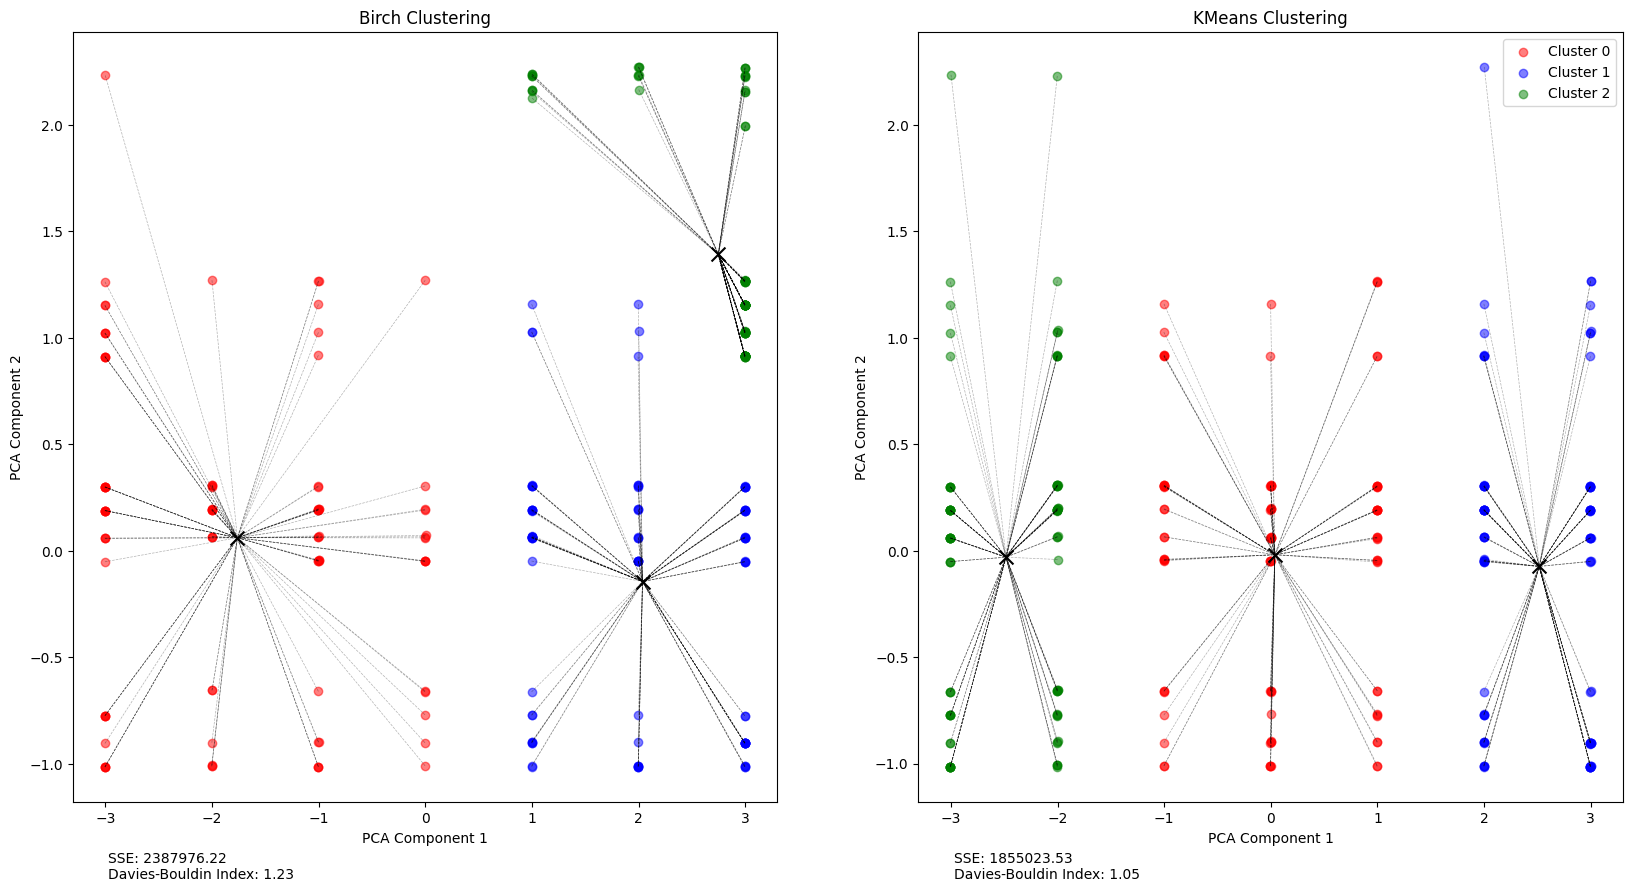

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
dataa_pca = pca.fit_transform(dataset_cluster)

# Sample 100 points from each cluster
samples_per_cluster = 100
colors = ['red', 'blue', 'green']  # Colors for clusters 0, 1, 2

def sample_data(labels):
    sampled_indices = np.hstack([np.random.choice(np.where(labels == i)[0], samples_per_cluster, replace=False) for i in range(3)])
    return dataa_pca[sampled_indices], labels[sampled_indices]

# Sample data for Birch and KMeans
dataa_pca_birch, labels_birch_sampled = sample_data(labels_birch)
dataa_pca_kmeans, labels_kmeans_sampled = sample_data(labels_kmeans)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plotting function for 2D
def plot_clusters(ax, data, labels, centroids, title, score_text):
    for i, color in enumerate(colors):
        cluster_data = data[labels == i]

        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {i}', alpha=0.5)


        centroid = centroids[i]
        ax.scatter(centroid[0], centroid[1], marker='x', s=100, color='k')

        # lines from samples to the centroid
        for point in cluster_data:
            ax.plot([point[0], centroid[0]], [point[1], centroid[1]], 'k--', linewidth=0.5, alpha=0.3)

    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    plt.legend(loc='upper right')
    ax.text(0.05, -0.1, score_text, transform=ax.transAxes)

# Calculate centroids for the samples in 2D
centroids_birch_pca = np.array([dataa_pca_birch[labels_birch_sampled == i].mean(axis=0) for i in range(3)])
centroids_kmeans_pca = np.array([dataa_pca_kmeans[labels_kmeans_sampled == i].mean(axis=0) for i in range(3)])

# Plot for Birch
plot_clusters(ax1, dataa_pca_birch, labels_birch_sampled, centroids_birch_pca, 'Birch Clustering', 'SSE: {:.2f}\nDavies-Bouldin Index: {:.2f}'.format(total_sse, db_score))

# Plot for KMeans
plot_clusters(ax2, dataa_pca_kmeans, labels_kmeans_sampled, centroids_kmeans_pca, 'KMeans Clustering', 'SSE: {:.2f}\nDavies-Bouldin Index: {:.2f}'.format(sse_kmeans, db_score_kmeans))

plt.show()



# Applied PCA and 3D RERESENTATION

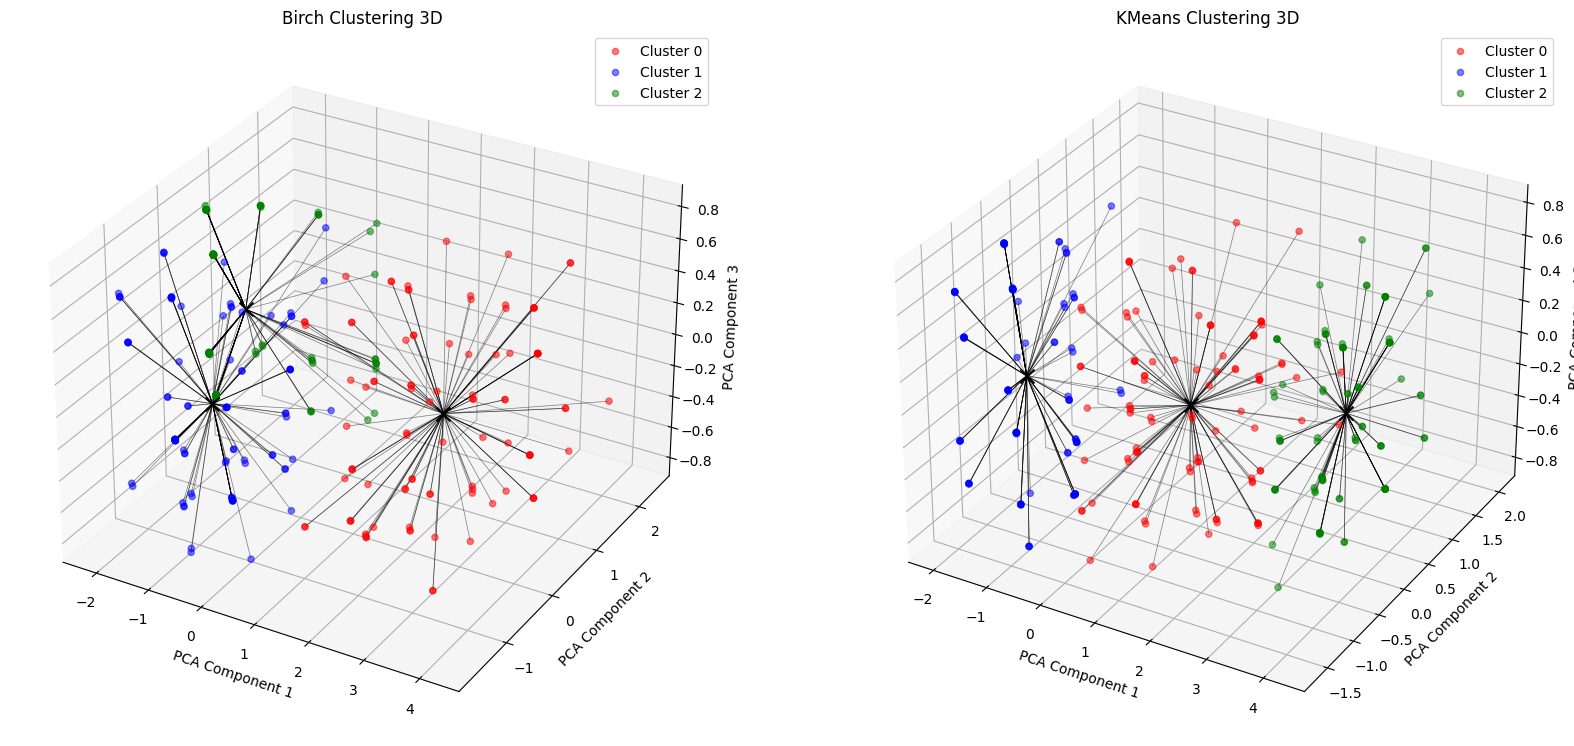

In [9]:

from mpl_toolkits.mplot3d import Axes3D

# Taking 100 samples per cluster
samples_per_cluster = 100
colors = ['red', 'blue', 'green']

# Sample indices for each cluster
def sample_indices(labels, n_samples_per_cluster):
    unique_labels = np.unique(labels)
    indices = np.hstack([np.random.choice(np.where(labels == label)[0], n_samples_per_cluster, replace=False)
                         for label in unique_labels])
    return indices

# Sample indices from the original labels
birch_indices = sample_indices(labels_birch, samples_per_cluster)
kmeans_indices = sample_indices(labels_kmeans, samples_per_cluster)

# Applying PCA to reduce dimensions to 3 for visualization
pca = PCA(n_components=3)

# Dataframe check
if isinstance(dataset_cluster, pd.DataFrame):
    dataa_pca_3d_birch = pca.fit_transform(dataset_cluster.iloc[birch_indices].values)
    dataa_pca_3d_kmeans = pca.transform(dataset_cluster.iloc[kmeans_indices].values)
else:
    dataa_pca_3d_birch = pca.fit_transform(dataset_cluster[birch_indices])
    dataa_pca_3d_kmeans = pca.transform(dataset_cluster[kmeans_indices])

# Labels update
labels_birch_sampled = labels_birch[birch_indices]
labels_kmeans_sampled = labels_kmeans[kmeans_indices]

# Centroid calculation
centroids_birch = np.array([dataa_pca_3d_birch[labels_birch_sampled == i].mean(axis=0) for i in np.unique(labels_birch_sampled)])
centroids_kmeans = np.array([dataa_pca_3d_kmeans[labels_kmeans_sampled == i].mean(axis=0) for i in np.unique(labels_kmeans_sampled)])

# Visualization in 3D
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection='3d', title='Birch Clustering 3D')
ax2 = fig.add_subplot(122, projection='3d', title='KMeans Clustering 3D')

# plot clusters and centroid lines in 3D
def plot_clusters_3d(ax, data, labels, centroids, title):
    for i, color in enumerate(colors):

        cluster_data = data[labels == i]

        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c=color, label=f'Cluster {i}', alpha=0.5)

        ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], c='k', marker='x', s=100)

        # lines from each point to the centroid
        for point in cluster_data:
            ax.plot([point[0], centroids[i][0]], [point[1], centroids[i][1]], [point[2], centroids[i][2]], 'k-', linewidth=0.5, alpha=0.5)

    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend()

# Plot for Birch in 3D
plot_clusters_3d(ax1, dataa_pca_3d_birch, labels_birch_sampled, centroids_birch, 'Birch Clustering 3D')

# Plot for KMeans in 3D
plot_clusters_3d(ax2, dataa_pca_3d_kmeans, labels_kmeans_sampled, centroids_kmeans, 'KMeans Clustering 3D')

plt.show()
